
# **BOOTCAMP on Deep Learning and Computer Vision**
# **@Siliguri Institute of Technology, India**
# Week-4 | Date: October 13, 2023

## **Part-1: ANN-Based Image Classification on Raw Pixels**

In this week you will be implementing ANN-Based Image classifier for FashsionMNIST!

So lets get started!

Adapted from:[Link](https://colab.research.google.com/github/goodboychan/goodboychan.github.io/blob/main/_notebooks/2020-09-21-01-Image-Classification-with-Fashion-MNIST.ipynb)

## Tasks for this lab:

1. Dataset Preparation: FashionMNIST.
2. ANN-Model Creation
3. Model Training
4. Evaluation


### Step 1: Import required packages



In [9]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

### Step 2. Dataset preparation

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

* To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.
* For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top, as in the ascii-diagram below.

Labels

Each training and test example is assigned to one of the following labels:

   * 0 T-shirt/top
   * 1 Trouser
   * 2 Pullover
   * 3 Dress
   * 4 Coat
   * 5 Sandal
   * 6 Shirt
   * 7 Sneaker
   * 8 Bag
   * 9 Ankle boot

**Reference:**

https://www.kaggle.com/datasets/zalando-research/fashionmnist

https://www.tensorflow.org/api_docs/python/tf/keras/datasets

In [18]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


### Nomalizing the pixels values to [0,1] and reshape to a 1D array to use it as a feature vector (normalized raw pixels)

In [19]:
X_train = X_train / 255.
X_train = X_train.reshape([-1, 28*28])
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.int32)

X_test = X_test / 255.
X_test = X_test.reshape([-1, 28*28])
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.int32)

### Create data pipeline

To create an input pipeline, you must start with a data source. For example, to construct a Dataset from data in memory, you can use **tf.data.Dataset.from_tensors()** or **tf.data.Dataset.from_tensor_slices()**. Alternatively, if your input data is stored in a file in the recommended TFRecord format, you can use **tf.data.TFRecordDataset()**.
 While building input pipeline, we can chain the method with shuffle, prefetch, and repeat.

Source and Reference:
https://www.tensorflow.org/guide/data

In [20]:
# Train_dataset Pipeline
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))\
           .shuffle(buffer_size=len(X_train))\
           .batch(batch_size=128)\
           .prefetch(buffer_size=128)\
           .repeat()

# Test dataset pipeline
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))\
            .batch(batch_size=128)\
            .prefetch(buffer_size=128)\
            .repeat()

### Visualize some sample from the dataset

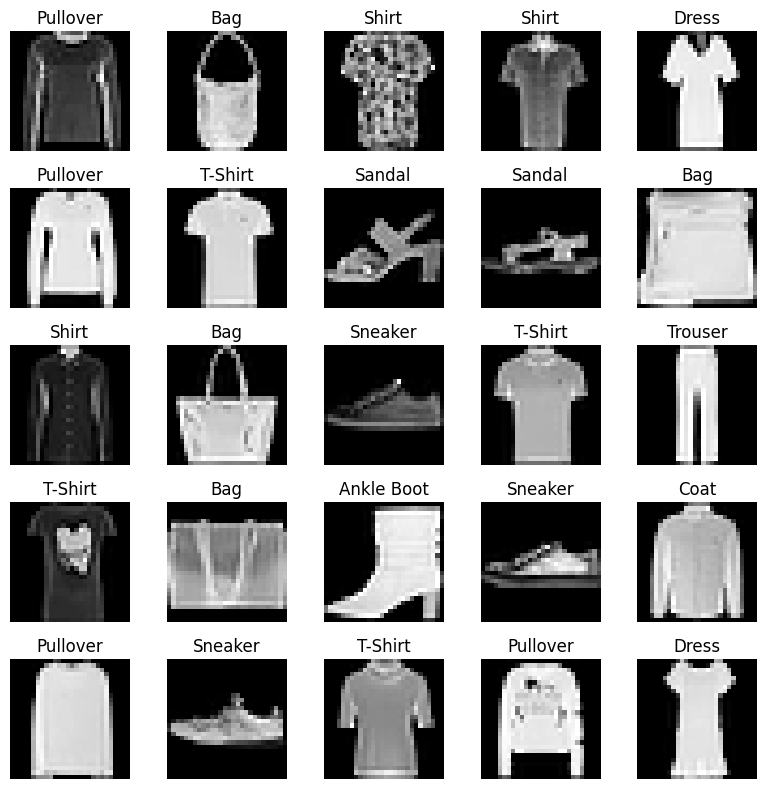

In [21]:
labels_map = {0: 'T-Shirt', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat',
              5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle Boot'}
columns = 5
rows = 5
fig = plt.figure(figsize=(8, 8))

for i in range(1, columns * rows+1):
    data_idx = np.random.randint(len(X_train))
    img = X_train[data_idx].reshape([28, 28])
    label = labels_map[y_train[data_idx]]

    fig.add_subplot(rows, columns, i)
    plt.title(label)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
plt.tight_layout()
plt.show()

### Build the ANN Model

In [51]:
# Build Sequential Model
model_multilayer_simple = tf.keras.Sequential(name='ann')

model_multilayer_simple.add(tf.keras.layers.Dense(256, input_shape=(28*28, ))) ## Try changing 512
#model_multilayer_simple.add(tf.keras.layers.Dense(256, activation='relu')) ## and add this layer
model_multilayer_simple.add(tf.keras.layers.ReLU())
model_multilayer_simple.add(tf.keras.layers.Dense(10, activation='softmax'))

In [52]:
model_multilayer_simple.summary()

Model: "ann"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 256)               200960    
                                                                 
 re_lu_3 (ReLU)              (None, 256)               0         
                                                                 
 dense_21 (Dense)            (None, 10)                2570      
                                                                 
Total params: 203530 (795.04 KB)
Trainable params: 203530 (795.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
# Compile the model

model_multilayer_simple.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [59]:
history= model_multilayer_simple.fit(train_ds, batch_size=128, steps_per_epoch=len(X_train)/128, epochs=10)

Epoch 1/10
468/468 [==============================] - 4s 8ms/step - loss: 0.2317 - accuracy: 0.9118
Epoch 2/10
468/468 [==============================] - 4s 7ms/step - loss: 0.2255 - accuracy: 0.9144
Epoch 3/10
468/468 [==============================] - 3s 5ms/step - loss: 0.2229 - accuracy: 0.9151
Epoch 4/10
468/468 [==============================] - 3s 5ms/step - loss: 0.2216 - accuracy: 0.9159
Epoch 5/10
468/468 [==============================] - 3s 6ms/step - loss: 0.2201 - accuracy: 0.9161
Epoch 6/10
468/468 [==============================] - 4s 8ms/step - loss: 0.2192 - accuracy: 0.9166
Epoch 7/10
468/468 [==============================] - 3s 7ms/step - loss: 0.2186 - accuracy: 0.9176
Epoch 8/10
468/468 [==============================] - 3s 5ms/step - loss: 0.2178 - accuracy: 0.9173
Epoch 9/10
468/468 [==============================] - 3s 6ms/step - loss: 0.2171 - accuracy: 0.9178
Epoch 10/10
468/468 [==============================] - 3s 5ms/step - loss: 0.2167 - accuracy: 0.9180

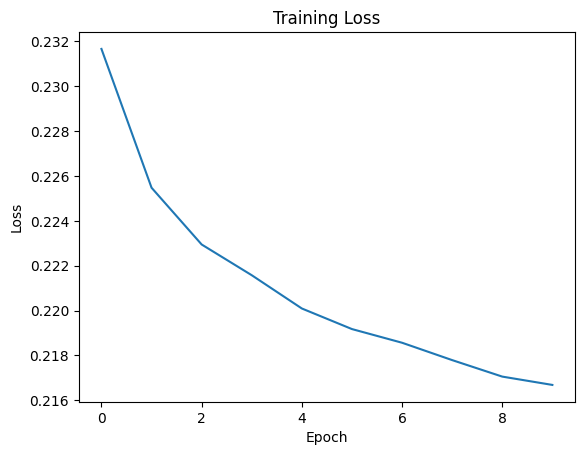

In [60]:
# Plot training loss
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

### Evaluate the model on Test dataset

In [61]:
loss, acc = model_multilayer_simple.evaluate(test_ds, steps=len(X_test)/128)
print('test loss is {}'.format(loss))
print('test accuracy is {}'.format(acc))

78/78 [==============================] - 0s 3ms/step - loss: 0.3868 - accuracy: 0.8785
test loss is 0.3867698013782501
test accuracy is 0.8784999847412109


### Test on some samples

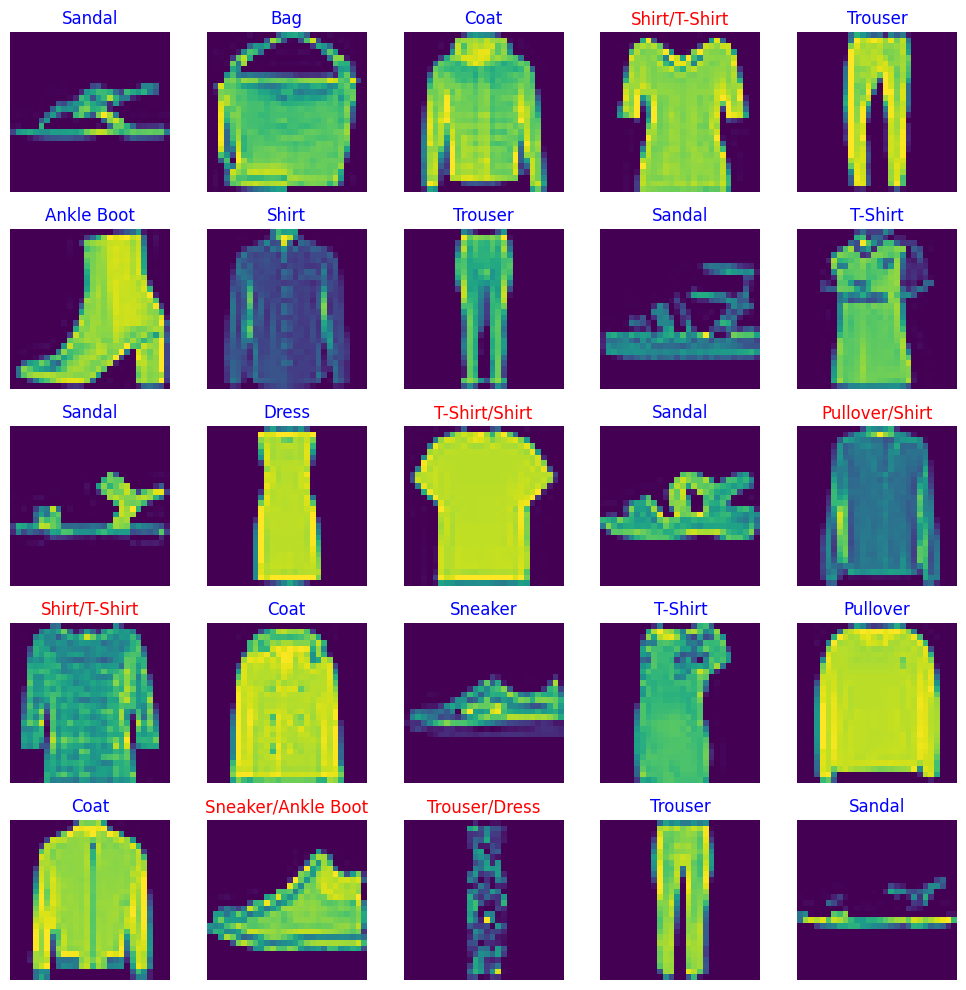

In [62]:
test_batch_size = 25
batch_index = np.random.choice(len(X_test), size=test_batch_size, replace=False)

batch_xs = X_test[batch_index]
batch_ys = y_test[batch_index]
y_pred_ = model_multilayer_simple(batch_xs, training=False)

fig = plt.figure(figsize=(10, 10))
for i, (px, py, y_pred) in enumerate(zip(batch_xs, batch_ys, y_pred_)):
    p = fig.add_subplot(5, 5, i+1)
    if np.argmax(y_pred) == py:
        p.set_title("{}".format(labels_map[py]), color='blue')
    else:
        p.set_title("{}/{}".format(labels_map[np.argmax(y_pred)],
                               labels_map[py]), color='red')
    p.imshow(px.reshape(28, 28))
    p.axis('off')
plt.tight_layout()